# Data exploration regarding strategies to deal with the Covid-19 outbreak
## by Leopold Walther

## Preliminary Wrangling

The main question which made me start the analysis is: What is the best strategy for a state to battle the Covid-19 outbreak. There are several debates on how to act on overcoming this global pandemic. There are goverments that want to prevent overburdening of the health system through the lockdown like the spanish or german, while other countries rely on the responsibility of the individual without major restrictions, namely the swedish. Futhermore, there are governments that do not see any danger through the virus for their population or at least evaluate the economic damage through a lockdown more dramatically than the effects of the virus itself. Data was gathered from Wikipedia, Gapminder and the John Hopkins University. The amount of confirmed cases of Covid-19, deaths and recovered of the John Hopkins Data paired with information like intensive care beds retrieved from wikipedia ist the basis of this analysis. With this data the outbreaks timelines of different countries can be compared in the context of their strategies.

In [44]:
# One dimensional
    #Countries with highest death rates (bar chart) --> what is real death rate?
    #

# Two dimensional
    # Corona Virus Cases overt time per country line? (umeric discrecte vs numeric continouos) --> zoom in on not extreme countries
    # R-factor of countries over time
    # monthly/weekly deaths compared to "normal years" --> Sweden compared to other nordic countries

# Multi dimensional
    # comparison of share of single person households, share of population over 65, 
        #population per sqm, percentage living in cities, diabetes
        # Heatmap Countries cases?? https://medium.com/@tomaspueyo/coronavirus-learning-how-to-dance-b8420170203e
        
# other constructions
    # How long would it last to make 2/3 immun without vaccine? -->
    # Minimum Deaths when all infected and no vaccine, but enough medical care vs maximum death when hospitals overhelmed



Import Packages for visual exploration:

In [45]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
from datetime import date
from datetime import timedelta
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sb

Load dataset, prepared in gather_clean_Covid19:

In [46]:
# Read Covid-19 data from csv
df_covidCases_Timeline = pd.read_csv('outputData/df_covidCases_Timeline.csv')
df_covidTests_Snapshot = pd.read_csv('outputData/df_covidTests_Snapshot.csv')
df_countryMetrics_Snapshot = pd.read_csv('outputData/df_countryMetrics_Snapshot.csv')
df_householdsEU_Timeline = pd.read_csv('outputData/df_householdsEU_Timeline.csv')
df_hospitals_Snapshot = pd.read_csv('outputData/df_hospitals_Snapshot.csv')
df_populationDelta_Timeline = pd.read_csv('outputData/df_populationDelta_Timeline.csv')

In [47]:
# Datatype datetime gets lost with write & read csv
df_covidCases_Timeline.date=pd.to_datetime(df_covidCases_Timeline.date)

In [48]:
# Check if datatype of date now correct
df_covidCases_Timeline.dtypes

Unnamed: 0             int64
country               object
date          datetime64[ns]
fatal                  int64
confirmed              int64
recovered              int64
iso_code              object
dtype: object

In [49]:
# Get dates of today and yesterday depending on day script is run

#today = pd.to_datetime(date.today())
#yesterday = pd.to_datetime(date.today() - timedelta(days=3))

# To not have changing graphs every day I will take May 18th as date
dateSnapshot = pd.to_datetime('2020-05-17')


### Structure of your datasets

There are six datasets in this analysis. 
Base of this analysis is the dataset 'df_covidCases_Timeline' containing the data related to the spread of Covid-19 over time. Each row holds the following variables for one country on one date: accumulated confirmed cases of Covid-19, accumulated fatal cases related to Covid-19 and cases recovered from Covid-19. There are 20,475 observations in this dataset on May 18th 2020. This data is gathered by the [John Hopkins University](https://hub.jhu.edu/novel-coronavirus-information/) and daily updated with new observations. All variables but country names are of numeric nature.
This dataset is complemented by another dataset df_covidTests_Snapshot by the [Unitversity of Oxford](https://ourworldindata.org/about) tracking tests perfomed by countries. The dataset df_covidTests_Snapshot only contains the most recent values available for 92 countries.
Further numeric statistics like population size or area of 207 countries is part of the dataframe df_countryMetrics_Snapshot.
The dataframe df_householdsEU_Timeline holds ordinal categorical data regarding the distribution of the population among household sizes. Household sizes, 1 person, 2 persons, 3 persons, 4 persons, 5 persons, 6 persons or more.
Further information in numeric form about hospital beds, for example existing intensive care units per countries are in the dataframe df_hospitals_Snapshot.
Reference data regarding birth and death rates of countries month wise over the past years is available in df_populationDelta_Timeline. With this data it will be possible to determine the mortality displacement for the year 2020, probably caused by Covid-19 or secondary effects of the pandemic.


### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out the differences in the spread of Covid-19 among the northern european countries and Germany. These countries have similar cultures, weather and household situations. Therefore I see them fit for a comparison of strategies. How did Sweden perform as a country with very soft measures regarding lockdown against the Covid-19 pandmic compared to the other nordic countries and Germany.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect to see a lower mortality rate among the countries with soon implemented strong measures. The sooner and firmer measures were taken I expect to see a stronger decrease in new cases.


First of all, what country did take what measure when:

- Denmark: 
    - political measures: since 14 March 2020, ban on meetings for more than ten people.
    - school closing: since 14 March 2020 Schools, kindergartens closed.
    - further measures: since 14 March 2020 Restaurants, cafés and leisure facilities.
    
- Germany:
    - school closing: since 16 March 2020 Schools, day care centres.
    - further measures: since 13 March 2020 major events are forbidden, since 23 March 2020 comprehensive ban on contact, catering businesses (except take-away food and beverages), service companies in the personal hygiene sector (e.g. hairdressers).
   
- France:
    - school closing: since 16 March 2020 schools, universities and day care centres.
    - further measures: facilities open to the public were closed down (shops, restaurants, etc.) since 16 March 2020.
    
- Italy: 
    - political measures: on 22 February 2020 Friuli-Venezia Giulia was the first Italian region to declare a state of emergency.
    - school closing: since 10 March 2020 nationwide schools and universities
    - further measures: on 22 February 2020 the carnival in Venice was prematurely terminated, since 9 March 2020 movement restrictions throughout Italy, since 12 March 2020 closure of all Catholic churches in Rome (Vatican decree).
    
- Norway:
    - school closing: since 13 March 2020 Kindergartens, schools and universities
    
- Spain:
    - political measures: since 16 March 2020 Emergency 
    - further measures: since 16 March 2020, all establishments open to the public (shops, restaurants), except grocery stores and pharmacies

[Wikipedia](https://de.wikipedia.org/wiki/COVID-19-Pandemie#Maßnahmen_in_der_EU)
    

In the following graphic countries in dark blue have issued a nationwide lockdown, light blue issued decentralistic lockdowns and grey without lockdown.

<img src="img/COVID-19_Outbreak_lockdowns.svg"> [Wikipedia](https://de.wikipedia.org/wiki/COVID-19-Pandemie#/media/Datei:COVID-19_Outbreak_lockdowns.svg)

In this analysis I will concentrate on comparing nordic countries, as the housing situation (see visualization at end of this document) here favors lockdowns. These countries are the ones with the highest percentage of one-person households. Meaning, if there is a person with Covid-19 in lockdown, there is no room mate or family to infect. But more to that later.

In [50]:
# Get current data of Covid cases without history
df_covidCases_today = df_covidCases_Timeline.query('date == @dateSnapshot')

In [51]:
# Merge addtional info
df_countryMetrics_Snapshot.drop(['Unnamed: 0', 'iso_code'], axis=1, inplace=True)
df_covidCases_today = pd.merge(df_covidCases_today, df_countryMetrics_Snapshot, on=['country'])

df_covidTests_Snapshot.drop(['Unnamed: 0', 'ISO code', 'date'], axis=1, inplace=True)
df_covidCases_today = pd.merge(df_covidCases_today, df_covidTests_Snapshot, on=['country'])

df_hospitals_Snapshot.drop(['Unnamed: 0', 'continent'], axis=1, inplace=True)
df_covidCases_today = pd.merge(df_covidCases_today, df_hospitals_Snapshot, on=['country'])

df_covidCases_today.drop(['Unnamed: 0'], axis=1, inplace=True)

In [52]:
# Countries of interest (European countries with more than 40% 1-person households)

northern_european = ['Norway', 'Denmark', 'Finland', 'Germany', 'Sweden']

In [53]:
df_covidCases_today.head()

,country,date,fatal,confirmed,recovered,iso_code,continent,population,population_density,median_age,...,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_100k,Cumulative total,Cumulative total per thousand,hospital_beds_per_1000_people,occupancy,ICU-CCB_beds_per_1000_people,ventilators
0,Netherlands,2020-05-17,5699,44195,167,NLD,Europe,17134873,508.544,43.2,...,5.29,24.4,27.3,3.32,287943,16.805,3.32,65.4,6.4,NaN
1,New Zealand,2020-05-17,21,1499,1433,NZL,Oceania,4822233,18.206,37.9,...,8.08,14.8,17.2,2.61,223937,46.438,2.71,NaN,4.6,334.0
2,Norway,2020-05-17,232,8249,32,NOR,Europe,5421242,14.462,39.7,...,5.31,19.6,20.7,3.60,216350,39.908,3.60,80.7,8.0,800.0
3,Poland,2020-05-17,925,18529,7451,POL,Europe,37846605,124.027,41.8,...,5.91,23.3,33.1,6.62,576276,15.227,6.62,NaN,6.9,10100.0
4,Portugal,2020-05-17,1218,29036,4636,PRT,Europe,10196707,112.371,46.2,...,9.85,16.3,30.0,3.39,600061,58.849,3.39,66.8,4.2,1400.0


## Univariate Exploration

I will start by looking into the most recent available numbers of confirmed Covid-19 cases per country and different approaches to measure the mortality.
The novel Sars-CoV-2 virus spread all over the world in only a few months. It is still not clear what the mortality rate of Covid-19 is, furhermore this rate may vary depending on the country. Covid-19 is the loung desease caused by the Sars-CoV-2 virus. I will use the data collected by John Hopkins University on confirmed cases and fatal cases of Covid-19 to compare how hard countries are hit by the spread of the virus and the consequences. 

In [54]:
# Drop all countries which are not of interest in this analysis

df_covidCases_today = df_covidCases_today[df_covidCases_today['country'].isin(northern_european)]

In [56]:
# Set color palette to just one
base_color = sb.color_palette()[0]

#### Confirmed cases of Covid-19 per country

In [83]:
df_covidCases_today.set_index('country', inplace=True)

In [84]:
df_covidCases_today.confirmed

country
Norway       8249
Sweden      30143
Denmark     11125
Germany    176369
Finland      6347
Name: confirmed, dtype: int64

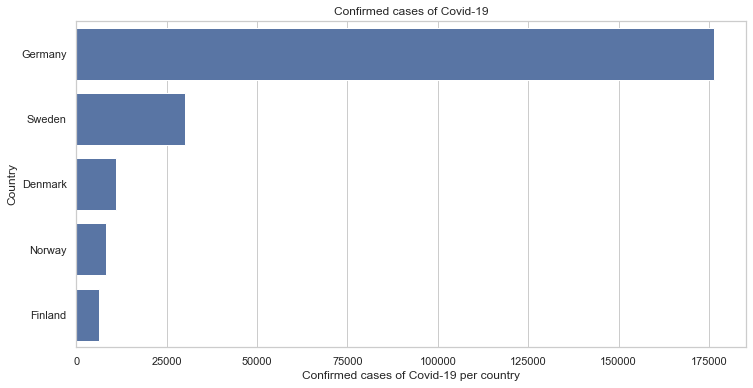

In [57]:
# Define figure size
plt.figure(figsize=[12,6])

# Plot barplot with 10 countries of most cases 
sb.barplot(data=df_covidCases_today.sort_values('confirmed', ascending=False), 
           x='confirmed', y='country', color = base_color )

# Set grid for better comparibility
sb.set(style="whitegrid")

# Write lables and header
plt.xlabel('Confirmed cases of Covid-19 per country')
plt.ylabel('Country');
plt.title('Confirmed cases of Covid-19')  # <-- how can I put variable 'today' hier?

#axes = plt.gca()
#axes.set_xlim([0,160])
#axes.set_ylim([0,160])

plt.show()

In this comparison of confirmed cases per country, a snapshot of the data at may 17th 2020, we see that Germany has clearly the most confirmed cases with few more than 175000. Next among the countries visualized in this graphic is Sweden with more than 30000 cases of confirmed Covid-19 infections. Denmark, Norway and Finland report each less than 12000 cases.
This is metric does not give a good insight on how hard a country is hit by a pandemic, as countries with big populations can have more infected people. So insted of looking at the absolute value of infected people, let's compare the same countris with the number of confirmed Covid-19 infections normalized on one million people. 

#### Confirmed cases of Covid-19 per 1 million population in northern european countries

In [58]:
# Feature Engineering

# Create column fatal per confirmed
df_covidCases_today['confirmedPer1MPopulation'] = df_covidCases_today.fatal * 1000000 / df_covidCases_today.population

In [88]:
df_covidCases_today.confirmedPer1MPopulation

country
Norway      42.794622
Sweden     364.283755
Denmark     94.437298
Germany     95.030140
Finland     53.783643
Name: confirmedPer1MPopulation, dtype: float64

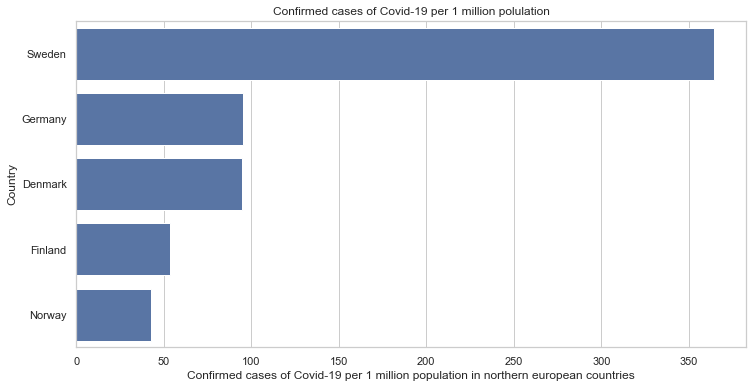

In [59]:
# Define figure size
plt.figure(figsize=[12,6])

# Plot barplot with 10 countries of most cases 
sb.barplot(data=df_covidCases_today.sort_values('confirmedPer1MPopulation', ascending=False), 
           x='confirmedPer1MPopulation', y='country', color = base_color )

# Set grid for better comparibility
sb.set(style="whitegrid")

# Write lables and header
plt.xlabel('Confirmed cases of Covid-19 per 1 million population in northern european countries')
plt.ylabel('Country');
plt.title('Confirmed cases of Covid-19 per 1 million polulation')  # <-- how can I put variable 'today' hier?

#axes = plt.gca()
#axes.set_xlim([0,160])
#axes.set_ylim([0,160])

plt.show()

The graphic above shows the confirmed cases of each country per one million inhabitants. Here we can see a different ranking compared to the graphic with absolute amount of confirmed Covid-19 cases. Sweden with 364 cases per one million inhabitants has by far the highest rate. Next with roughly 95 cases per one million inhabitants are Germany and Denmark. Finland with 54 and Norway with 43 have the lowest rate of the countries shown in this graphic. Infections are not necessarily dangerous, still some of those infected have to seek medical treatment and are at risk of long-term damage or even death. 
This rate may be far from reality, as the confirmed cases of Covid-19 may not necessarily correspond to the actual number of cases. The number of known Covid-19 infections for a country depends on the number of tests performed. The more a country tests, the closer the number of confirmed infections should be to the actual number of infections present. When the decentrally collected figures are combined, delays or individual errors may introduce further uncertainties into the statistics. 
Let's look into the amount of tests performed by the countries examined.

In [60]:
# Feature Engineering

# Create column fatal per confirmed
df_covidCases_today['fatalPerConfirmed'] = df_covidCases_today.fatal / df_covidCases_today.confirmed

#### Fatal cases related to Covid-19 in relation to the known infections of Covid-19

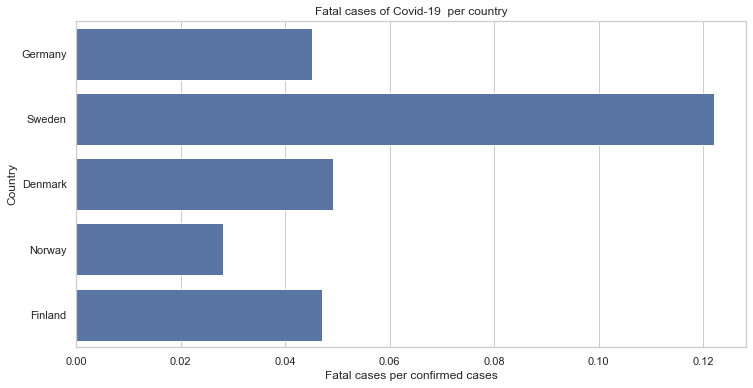

In [61]:
# Define figure size
plt.figure(figsize=[12,6])

# Plot barplot with 10 countries of most cases 
sb.barplot(data=df_covidCases_today.sort_values('confirmed', ascending=False).head(10), 
           x='fatalPerConfirmed', y='country', color = base_color )

# Set grid for better comparibility
sb.set(style="whitegrid")

# Write lables and header
plt.xlabel('Fatal cases per confirmed cases')
plt.ylabel('Country');
plt.title('Fatal cases of Covid-19  per country')

#axes = plt.gca()
#axes.set_xlim([0,160])
#axes.set_ylim([0,160])

plt.show()


Dividing the fatal cases of a country for the most recent available date by the confirmed cases of the same country and date gives a mortality rate. 
This rate may be far from reality, as the confirmed cases of Covid-19 may not necessarily correspond to the actual number of cases. This also applies to the number of deaths caused by Covid-19. Different countries and regions have different rules as to when a death is included in the statistics of deaths caused by Covid-19. 
Furhermore, the number of known Covid-19 infections for a country depends on the number of tests performed. The more a country tests, the closer the number of confirmed infections should be to the actual number of infections present. When the decentrally collected figures are combined, delays or individual errors may introduce further uncertainties into the statistics. 

In the following graphic the mortality rate of Covid-19 is depicted for the 10 countries with the highest amount of infections based on data gathered by the John Hopkins University.

In [62]:
# Feature Engineering

# Create column deaths per 1 million population
df_covidCases_today['fatalPer1MPopulation'] = df_covidCases_today.fatal *1000000 / df_covidCases_today.population

#### Fatal cases related to Covid-19 per 1 million people in country

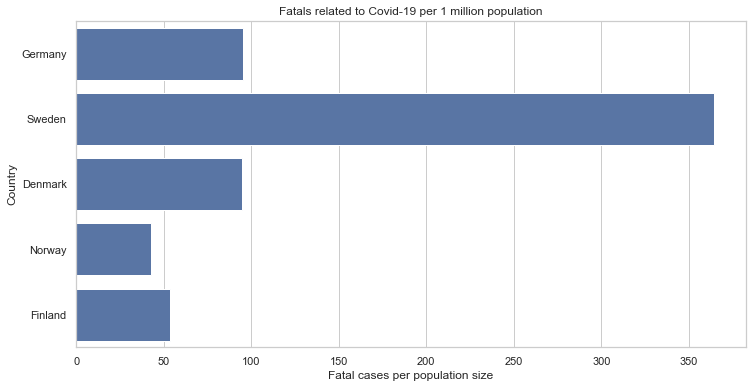

In [63]:
# Define figure size
plt.figure(figsize=[12,6])

# Plot barplot with 10 countries of most cases 
sb.barplot(data=df_covidCases_today.sort_values('confirmed', ascending=False).head(10), 
           x='fatalPer1MPopulation', y='country', color = base_color )

# Set grid for better comparibility
sb.set(style="whitegrid")

# Write lables and header
plt.xlabel('Fatal cases per population size')
plt.ylabel('Country');
plt.title('Fatals related to Covid-19 per 1 million population')

#axes = plt.gca()
#axes.set_xlim([0,160])
#axes.set_ylim([0,160])

plt.show()

The mortality rate depends on a lot of different factors like age, healthcare system of the country, 



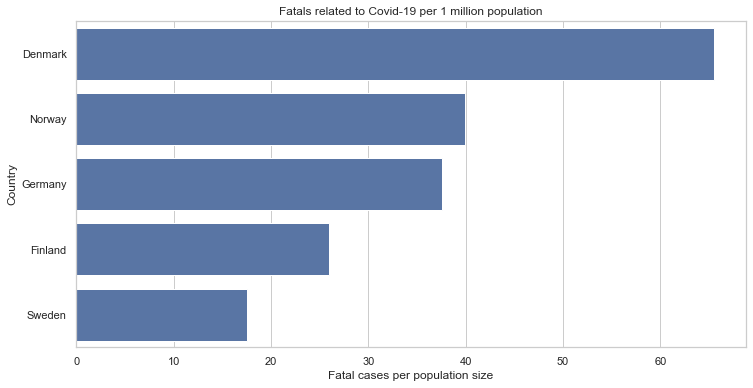

In [64]:
# tests performed

list(df_covidCases_today)

# Define figure size
plt.figure(figsize=[12,6])

# Plot barplot with 10 countries of most cases 
sb.barplot(data=df_covidCases_today.sort_values('Cumulative total per thousand', ascending=False), 
           x='Cumulative total per thousand', y='country', color = base_color )

# Set grid for better comparibility
sb.set(style="whitegrid")

# Write lables and header
plt.xlabel('Fatal cases per population size')
plt.ylabel('Country');
plt.title('Fatals related to Covid-19 per 1 million population')

#axes = plt.gca()
#axes.set_xlim([0,160])
#axes.set_ylim([0,160])

plt.show()

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

> Price has a long-tailed distribution, with a lot of diamonds on the low price end, and few on the high price end. When plotted on a log-scale, the price distribution looks roughly bimodal, with one peak between 500 and 1000, and a second peak a little below 5000. Interestingly, there's a steep jump in frequency right before 2000, rather than a smooth ramp up.
Next up, the first predictor variable of interest: carat.

> The cut quality of the diamonds in the dataset is generally quite good, with most of them in the Premium or Ideal level. Most of the diamonds are also of color quality G or better. Clarity, shows a trend opposite from the other two features, with most of the diamonds on the lower end of the scale, at VS2 or worse. Clarity grades become rarer as steps are taken up the scale.
I'll now look at the other features in the data to see if any of them hold interesting properties.

> The initial plot of the x, y, and z features show some immediate points of attention. On the y and z plots, most of the data is set to the far left of their axes, suggesting some strong outliers on the right. The left limits of all three plots also suggest that there are some points that take unusually small values. It's worth taking a bit of time to identify these outliers and see if they need to be filtered out of the data.

In [87]:
# spread of mortality rate for all countries in dataset

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The price variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data looked bimodal, with one peak between $500 and $1000, and another just below $5000.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> When investigating the x, y, and z size variables, a number of outlier points were identified. Overall, these points can be characterized by an inconsistency between the recorded value of depth, and the value that would be derived from using x, y, and z. For safety, all of these points were removed from the dataset to move forwards.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

> To start off with, I want to look at the pairwise correlations present between features in the data.

In [65]:

# Two dimensional
    # Corona Virus Cases overt time per country line? (umeric discrecte vs numeric continouos) --> zoom in on not extreme countries
    # R-factor of countries over time
    # monthly/weekly deaths compared to "normal years" --> Sweden compared to other nordic countries

In [66]:
# Violin plot with new cases over time

# create new column delta confirmed cases
df_covidCases_Timeline['confirmedDelta'] = df_covidCases_Timeline['confirmed'] 



In [67]:
df_covidCases_Timeline.head()

,Unnamed: 0,country,date,fatal,confirmed,recovered,iso_code,confirmedDelta
0,0,Afghanistan,2020-01-22,0,0,0,AFG,0
1,1,Afghanistan,2020-01-23,0,0,0,AFG,0
2,2,Afghanistan,2020-01-24,0,0,0,AFG,0
3,3,Afghanistan,2020-01-25,0,0,0,AFG,0
4,4,Afghanistan,2020-01-26,0,0,0,AFG,0


In [68]:
df_covidCases_Timeline = pd.merge(df_covidCases_Timeline, df_countryMetrics_Snapshot, on=['country'])

In [69]:
# Feature Engineerig: Create column with new confirmed cases per day

df_Norway = df_covidCases_Timeline.query('country == "Norway"').sort_values('date', ascending=False)
df_Norway['deltaConfirmed'] = (df_Norway['confirmed'] - df_Norway['confirmed'].shift(-1)).fillna(0).astype(int)

df_Denmark = df_covidCases_Timeline.query('country == "Denmark"').sort_values('date', ascending=False)
df_Denmark['deltaConfirmed'] = (df_Denmark['confirmed'] - df_Denmark['confirmed'].shift(-1)).fillna(0).astype(int)

df_Finland = df_covidCases_Timeline.query('country == "Finland"').sort_values('date', ascending=False)
df_Finland['deltaConfirmed'] = (df_Finland['confirmed'] - df_Finland['confirmed'].shift(-1)).fillna(0).astype(int)

df_Germany = df_covidCases_Timeline.query('country == "Germany"').sort_values('date', ascending=False)
df_Germany['deltaConfirmed'] = (df_Germany['confirmed'] - df_Germany['confirmed'].shift(-1)).fillna(0).astype(int)

df_Sweden = df_covidCases_Timeline.query('country == "Sweden"').sort_values('date', ascending=False)
df_Sweden['deltaConfirmed'] = (df_Sweden['confirmed'] - df_Sweden['confirmed'].shift(-1)).fillna(0).astype(int)

In [70]:
# Check visually if new column correctly calculated
df_Norway.head()

,Unnamed: 0,country,date,fatal,confirmed,recovered,iso_code,confirmedDelta,continent,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_100k,deltaConfirmed
1052,1052,Norway,2020-05-17,232,8249,32,NOR,8249,Europe,5421242,14.462,39.7,16.821,10.813,64800.057,5.31,19.6,20.7,3.6,12
1051,1051,Norway,2020-05-16,232,8237,32,NOR,8237,Europe,5421242,14.462,39.7,16.821,10.813,64800.057,5.31,19.6,20.7,3.6,18
1050,1050,Norway,2020-05-15,232,8219,32,NOR,8219,Europe,5421242,14.462,39.7,16.821,10.813,64800.057,5.31,19.6,20.7,3.6,23
1049,1049,Norway,2020-05-14,232,8196,32,NOR,8196,Europe,5421242,14.462,39.7,16.821,10.813,64800.057,5.31,19.6,20.7,3.6,21
1048,1048,Norway,2020-05-13,229,8175,32,NOR,8175,Europe,5421242,14.462,39.7,16.821,10.813,64800.057,5.31,19.6,20.7,3.6,18


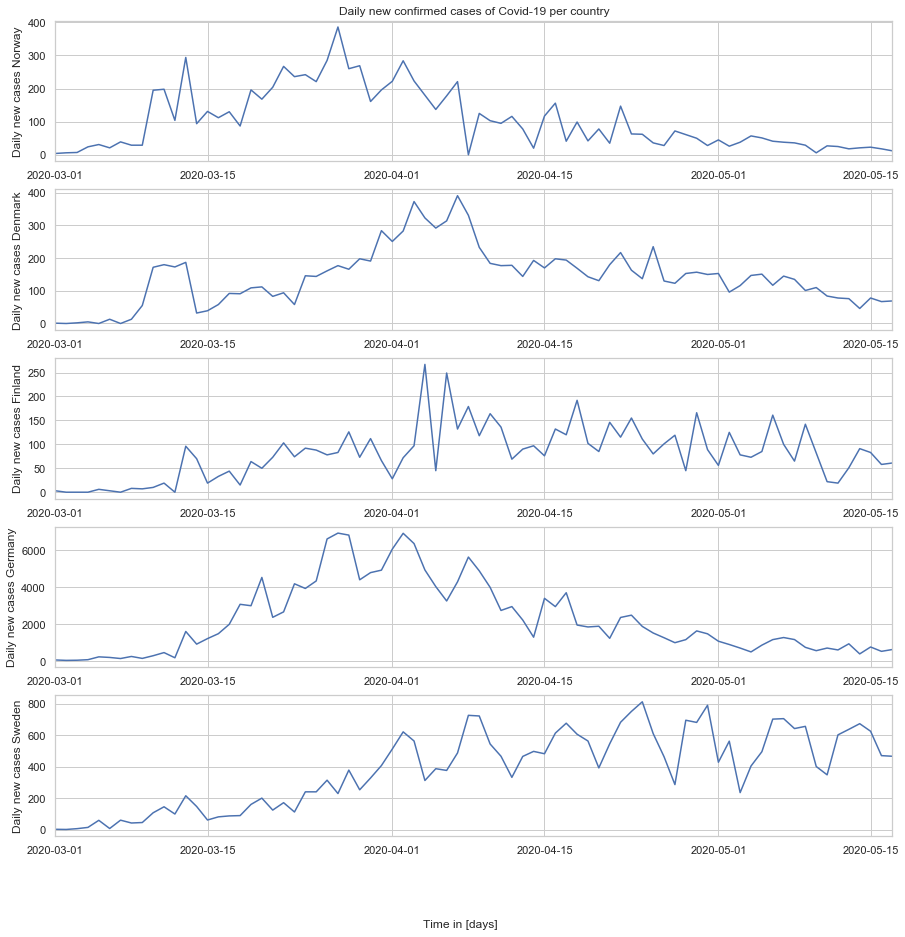

In [71]:
# new confirmed cases per day

fig, ax = plt.subplots(5, 1, figsize=(15,15))




ax1 = plt.subplot(5,1,1)
plt.plot('date', 'deltaConfirmed', data=df_Norway)
ax1.set_xlim([pd.to_datetime('2020-03-01'),dateSnapshot])
plt.ylabel('Daily new cases Norway');
plt.title('Daily new confirmed cases of Covid-19 per country')  # <-- how can I put variable 'today' hier?

ax2 = plt.subplot(5,1,2)
plt.plot('date', 'deltaConfirmed', data=df_Denmark)
ax2.set_xlim([pd.to_datetime('2020-03-01'),dateSnapshot])
plt.ylabel('Daily new cases Denmark');

ax3 = plt.subplot(5,1,3)
plt.plot('date', 'deltaConfirmed', data=df_Finland)
ax3.set_xlim([pd.to_datetime('2020-03-01'),dateSnapshot])
plt.ylabel('Daily new cases Finland');

ax4 = plt.subplot(5,1,4)
plt.plot('date', 'deltaConfirmed', data=df_Germany)
ax4.set_xlim([pd.to_datetime('2020-03-01'),dateSnapshot])
plt.ylabel('Daily new cases Germany');

ax5 = plt.subplot(5,1,5)
plt.plot('date', 'deltaConfirmed', data=df_Sweden)
ax5.set_xlim([pd.to_datetime('2020-03-01'),dateSnapshot])
plt.ylabel('Daily new cases Sweden');


fig.text(0.5, 0.04, 'Time in [days]', ha='center')


plt.show()

In [72]:
# Feature Engineering: Infections per 1 million population

# HOW WOULD A FUNCTION LOOK LIKE HERE TO NOT COPY PASTE THE CODE X TIMES LIKE BELOW?

df_Norway['deltaConfirmedPer1M'] = df_Norway['deltaConfirmed'] *1000000 / df_Norway['population']

df_Denmark['deltaConfirmedPer1M'] =  df_Denmark['deltaConfirmed'] *1000000 / df_Denmark['population']

df_Finland['deltaConfirmedPer1M'] =  df_Finland['deltaConfirmed'] *1000000 / df_Finland['population']

df_Germany['deltaConfirmedPer1M'] =  df_Germany['deltaConfirmed'] *1000000 / df_Germany['population']

df_Sweden['deltaConfirmedPer1M'] =  df_Sweden['deltaConfirmed'] *1000000 / df_Sweden['population']

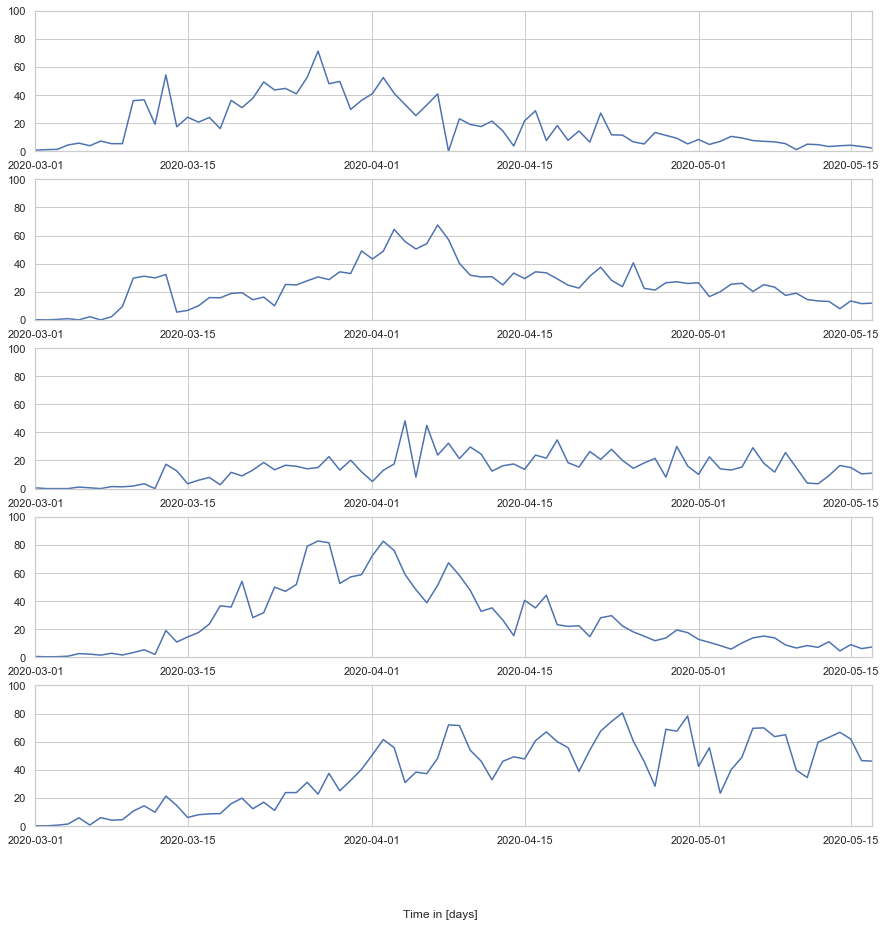

In [73]:
# new confirmed cases per 1m people and day

fig, ax = plt.subplots(5, 1, figsize=(15,15))
  
ax1 = plt.subplot(5,1,1)
plt.plot('date', 'deltaConfirmedPer1M', data=df_Norway)
ax1.set_xlim([pd.to_datetime('2020-03-01'),dateSnapshot])
ax1.set_ylim([0,100])

ax2 = plt.subplot(5,1,2)
plt.plot('date', 'deltaConfirmedPer1M', data=df_Denmark)
ax2.set_xlim([pd.to_datetime('2020-03-01'),dateSnapshot])
ax2.set_ylim([0,100])

ax3 = plt.subplot(5,1,3)
plt.plot('date', 'deltaConfirmedPer1M', data=df_Finland)
ax3.set_xlim([pd.to_datetime('2020-03-01'),dateSnapshot])
ax3.set_ylim([0,100])

ax4 = plt.subplot(5,1,4)
plt.plot('date', 'deltaConfirmedPer1M', data=df_Germany)
ax4.set_xlim([pd.to_datetime('2020-03-01'),dateSnapshot])
ax4.set_ylim([0,100])

ax5 = plt.subplot(5,1,5)
plt.plot('date', 'deltaConfirmedPer1M', data=df_Sweden)
ax5.set_xlim([pd.to_datetime('2020-03-01'),dateSnapshot])
ax5.set_ylim([0,100])


fig.text(0.5, 0.04, 'Time in [days]', ha='center')


plt.show()

In [74]:
# https://www.ukbonn.de/C12582D3002FD21D/vwLookupDownloads/Streeck_et_al_Infection_fatality_rate_of_SARS_CoV_2_infection2.pdf/%24FILE/Streeck_et_al_Infection_fatality_rate_of_SARS_CoV_2_infection2.pdf

> As expected, the 'x', 'y', and 'z' dimensions are all highly correlated with one another, and all of them are also highly correlated with carat. Since carat is a measure of diamond size, it's not too surprising that the overall trend between carat and the three individual dimensions appears polynomial. In addition, since all the diamonds are round-cut, it makes sense that the 'x', 'y', and 'z' sizes would all move proportionally together.
Surprisingly, the correlation coefficient between price and carat is very high, despite the fact that price has such a large range of values. This will be worth extra exploration in this section. Depth and table don't have strong correlations with any other numeric variables in the dataset, and we see the moderate negative correlation hypothesized in the previous section. I won't perform any further analyses with these variables since they don't look like they'll be of much further interest.
Let's move on to looking at how price and carat weight correlate with the categorical variables.

> Interestingly, it appears that there are some negative relationships between the categorical variables and the two numeric variables of interest. The diamonds with the best features (Ideal cut, color D, clarity IF) seem to get the lowest prices, but also tend to be smaller on average. This will be worth investigating more later on, using the full data.
Finally, let's look at relationships between the three categorical features.

> There doesn't seem to be that much interaction between diamond color and cut, though proportionally it seems like there might be more "Very Good" and "Premium" diamonds on the better color grades (F, E, and D). There are slightly larger interactions on the clarity grades, especially the lower levels of SI2, SI1, and VS2. It looks like there are more Very Good and Premium cut diamonds and more G, F, and E color diamonds compared to higher clarity grades.
With the preliminary look at bivariate relationships out of the way, I want to dig into some of the relationships more. First, I want to see how price and carat are related to one another for all of the data, and to plot price on a log scale.



### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Price had a surprisingly high amount of correlation with the diamond size, even before transforming the features. An approximately linear relationship was observed when price was plotted on a log scale and carat was plotted with a cube-root transform. The scatterplot that came out of this also suggested that there was an upper bound on the diamond prices available in the dataset, since the range of prices for the largest diamonds was much narrower than would have been expected, based on the price ranges of smaller diamonds.
There was also an interesting relationship observed between price and the categorical features. For all of cut, color, and clarity, lower prices were associated with increasing quality. One of the potentially major interacting factors is the fact that improved quality levels were also associated with smaller diamonds. This will have to be explored further in the next section.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Expected relationships were found in the association between the 'x', 'y', and 'z' measurements of diamonds to the other linear dimensions as well as to the 'carat' variable. A small negative correlation was observed between table size and depth, but neither of these variables show a strong correlation with price, so they won't be explored further. There was also a small interaction in the categorical quality features. Diamonds of lower clarity appear to have slightly better cut and color grades.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

> The main thing I want to explore in this part of the analysis is how the three categorical measures of quality play into the relationship between price and carat.

In [75]:
# Countries of interest (European countries with more than 40% 1-person households)

northern_southern_european = ['Norway', 'Denmark', 'Finland', 'Germany', 'Sweden', 'Italy', 'Spain', 'France']

In [76]:
# Drop all countries which are not of interest in this analysis

df_householdsEU_Timeline = df_householdsEU_Timeline[df_householdsEU_Timeline['country'].isin(northern_southern_european)]

In [77]:
df_householdsEU_Timeline_2018 = df_householdsEU_Timeline.query('year == "2018"').sort_values('1 person', ascending=False)

In [78]:
df_householdsEU_Timeline_2018

,Unnamed: 0,year,country,1 person,2 persons,3 persons,4 persons,5 persons,6 persons or more
303,303,2018,Norway,46.0,30.1,10.0,9.9,3.4,0.7
286,286,2018,Denmark,44.1,31.8,10.3,9.6,3.6,0.6
288,288,2018,Finland,43.0,33.9,10.2,8.4,3.2,1.4
311,311,2018,Sweden,42.5,31.2,11.2,10.8,3.1,1.1
290,290,2018,Germany,41.5,34.0,12.0,9.1,2.5,0.9
289,289,2018,France,35.8,32.8,13.3,12.6,3.9,1.5
295,295,2018,Italy,32.6,27.9,19.4,15.8,3.3,1.0
310,310,2018,Spain,25.5,30.4,20.9,17.7,4.1,1.4


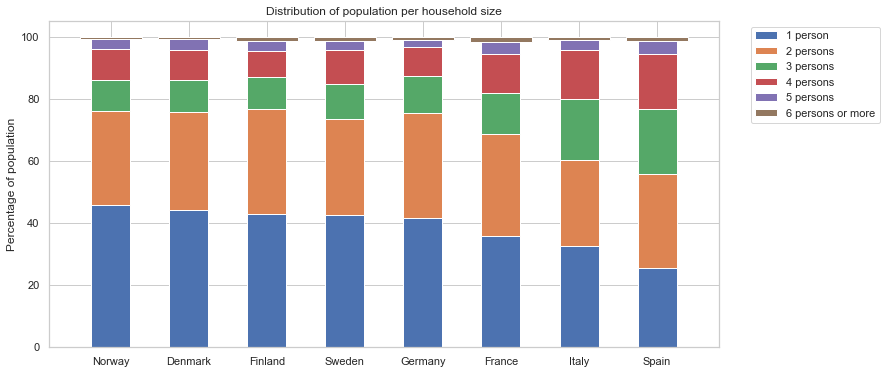

In [81]:
# households for each nordic country (Country, householdtype, share)

# Define figure size
plt.figure(figsize=[12,6])

N = 8
ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence

#plt.style.use(style_name)

p1 = plt.bar(ind, df_householdsEU_Timeline_2018['1 person'], width)
p2 = plt.bar(ind, df_householdsEU_Timeline_2018['2 persons'], width, 
             bottom=df_householdsEU_Timeline_2018['1 person'])
p3 = plt.bar(ind, df_householdsEU_Timeline_2018['3 persons'], width, 
             bottom=df_householdsEU_Timeline_2018['1 person']+df_householdsEU_Timeline_2018['2 persons'])
p4 = plt.bar(ind, df_householdsEU_Timeline_2018['4 persons'], width, 
             bottom=df_householdsEU_Timeline_2018['1 person']+df_householdsEU_Timeline_2018['2 persons']+df_householdsEU_Timeline_2018['3 persons'])
p5 = plt.bar(ind, df_householdsEU_Timeline_2018['5 persons'], width, 
             bottom=df_householdsEU_Timeline_2018['1 person']+df_householdsEU_Timeline_2018['2 persons']+df_householdsEU_Timeline_2018['3 persons']+df_householdsEU_Timeline_2018['4 persons'])
p6 = plt.bar(ind, df_householdsEU_Timeline_2018['6 persons or more'], 
             bottom=df_householdsEU_Timeline_2018['1 person']+df_householdsEU_Timeline_2018['2 persons']+df_householdsEU_Timeline_2018['3 persons']+df_householdsEU_Timeline_2018['4 persons']++df_householdsEU_Timeline_2018['5 persons'])




plt.ylabel('Percentage of population')
plt.title('Distribution of population per household size')
plt.xticks(ind, ('Norway', 'Denmark', 'Finland', 'Sweden', 'Germany', 'France', 'Italy', 'Spain'))
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), 
           ('1 person', '2 persons', '3 persons', '4 persons', '5 persons', '6 persons or more'), 
           bbox_to_anchor=(1.04,1))


plt.show()

In [ ]:
# graph of northern countries with stacked confirmed, recovered, fatal

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I extended my investigation of price against diamond size in this section by looking at the impact of the three categorical quality features. The multivariate exploration here showed that there indeed is a positive effect of increased quality grade on diamond price, but in the dataset, this is initially hidden by the fact that higher grades were more prevalent in smaller diamonds, which fetch lower prices overall. Controlling for the carat weight of a diamond shows the effect of the other C's of diamonds more clearly. This effect was clearest for the color and clarity variables, with less systematic trends for cut.

### Were there any interesting or surprising interactions between features?

> Looking back on the point plots, it doesn't seem like there's a systematic interaction effect between the three categorical features. However, the features also aren't fully independent. But it is interesting in something like the 1-carat plot for prices against cut and clarity, the shape of the 'cut' dots is fairly similar for the SI2 through VVS2 clarity levels.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [36]:
# cited from: https://www.rrighart.com/blog-covid19/a-jupyter-notebook-for-visualizing-the-covid-19-pandemic

    
    if pop == 'area' or pop == 'inhabitants': 
        dat[pop] = dat[pop].div(number)
        dat['yvalue'] = dat['metric'].div(dat[pop])
    else: dat['yvalue'] = dat['metric'].copy() 
    
    dat = dat[(dat['date']>=date1) & (dat['date']<=date2)]
    colors = mpl.cm.tab20(np.linspace(0,1,len(countries)))
    plt.figure(figsize = (16, 8))

    countries = list(dat.loc[(dat['Country/Region'].isin(countries)) & (dat['date']==dat['date'].max()), ['Country/Region', 'yvalue']].sort_values(by='yvalue', ascending=False)['Country/Region'])
    
    for i,j in zip(countries, np.arange(0,len(countries))):
        plt.plot(dat[dat['Country/Region'] == i]['date'], dat[dat['Country/Region'] == i]['yvalue'], label=i, marker='o', color=colors[j])
    plt.xticks(rotation='vertical')
    plt.ylabel('Number of '+filename+' Cases')
    plt.title(title, fontsize=16)
   
    plt.legend()
    plt.savefig('covid.png')

IndentationError: unexpected indent (<ipython-input-36-f449d8b381e9>, line 4)